In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=pd.read_csv("Mall_Customers.csv")
df

Matplotlib is building the font cache; this may take a moment.


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
X=df.iloc[:,[3,4]].values
x=df[['Annual Income (k$)', 'Spending Score (1-100)']]
x


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [39]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

In [40]:
wcss

[269981.28,
 183653.32894736837,
 106348.37306211118,
 73880.64496247197,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518779,
 24766.47160979344,
 23103.122085983916]

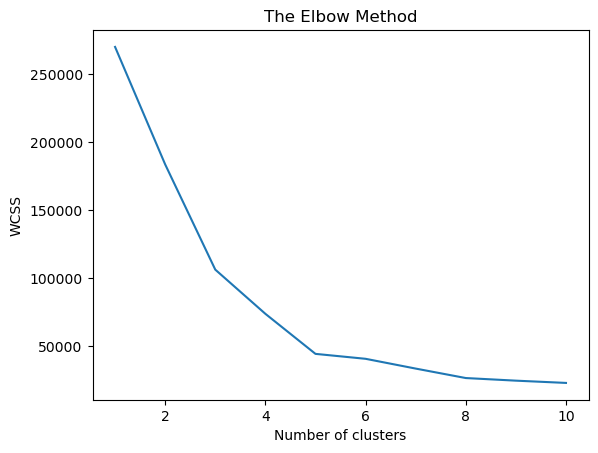

In [41]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmean.fit(x)
x['cluster number'] = kmean.fit_predict(x)
x

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8984\1634464568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster number'] = kmean.fit_predict(x)


,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


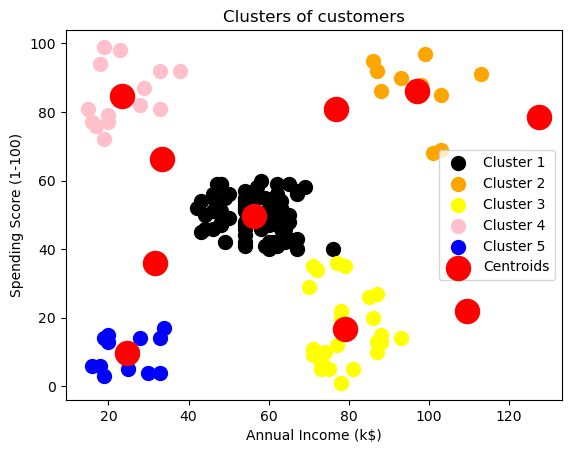

In [49]:
# Scatter plot for each cluster
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[kmeans.labels_ == 3, 0], X[kmeans.labels_ == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[kmeans.labels_ == 4, 0], X[kmeans.labels_ == 4, 1], s = 100, c = 'blue', label = 'Cluster 5')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')

# Adding titles and labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Adding legend
plt.legend()

# Display the plot
plt.show()